\***\*============================GRAPH PREPROCESSING============================**


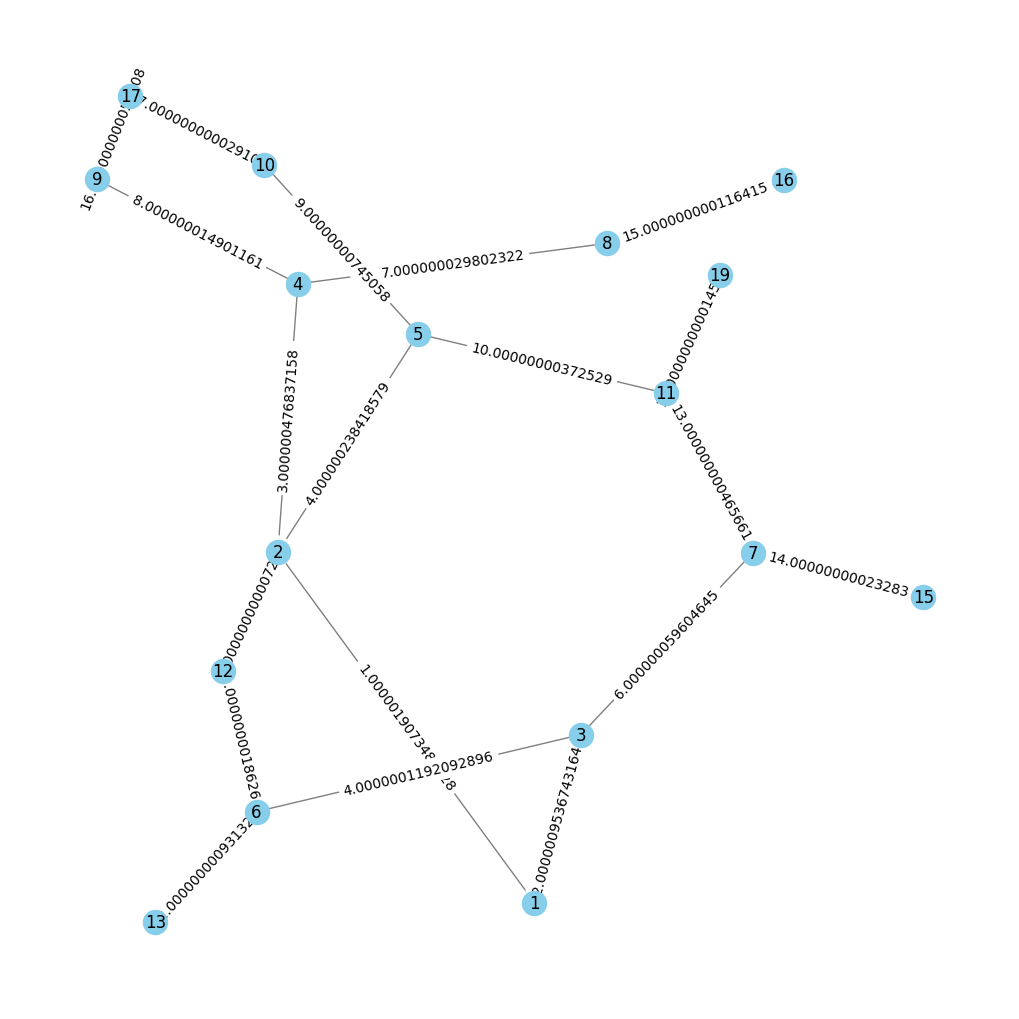

[1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11, 2.9103830456733704e-11, 1.4551915228366852e-11, 7.275957614183426e-12]


In [1]:
# Example usage
import networkx as nx
import matplotlib.pyplot as plt


# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight


def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))


num_nodes = 10

# Define a small fraction
fraction = []
for i in range(19):
    fraction.append(1/(2 ** (19+i)))

# Generate edges with unique weights
edges = [
    Edge(1, 2, 1 + fraction[0]),
    Edge(1, 3, 2 + fraction[1]),
    Edge(2, 4, 3 + fraction[2]),
    Edge(2, 5, 4 + fraction[3]),
    Edge(3, 6, 4 + fraction[4]),
    Edge(3, 7, 6 + fraction[5]),
    Edge(4, 8, 7 + fraction[6]),
    Edge(4, 9, 8 + fraction[7]),
    Edge(5, 10, 9 + fraction[8]),
    Edge(5, 11, 10 + fraction[9]),
    Edge(6, 12, 11 + fraction[10]),
    Edge(6, 13, 12 + fraction[11]),
    Edge(7, 11, 13 + fraction[12]),
    Edge(7, 15, 14 + fraction[13]),
    Edge(8, 16, 15 + fraction[14]),
    Edge(9, 17, 16 + fraction[15]),
    Edge(10, 17, 17 + fraction[16]),
    Edge(11, 19, 18 + fraction[17]),
    Edge(12, 2, 19 + fraction[18]),
]
G = nx.Graph()
# Convert Edge objects to tuples
G.add_weighted_edges_from((e.u, e.v, e.weight) for e in edges)

# Preprocess the graph
D = preprocess_graph(G)

# Create a new figure with a larger size
plt.figure(figsize=(10, 10))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color="skyblue", node_size=300, edge_color="gray"
)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
# print(D)
print(fraction)

=================================== Distance Oracle =====================================


In [2]:
class DistanceOracle:
    def __init__(self, distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances

    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))

    def __getitem__(self, key):
        return self.data[key]

    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance

    def add_edge(u, v, weight):
        G.add_edge(u, v, weight=weight)

    def get_edge_weight(G, u, v):
        if G.has_edge(u, v):
            return G[u][v]['weight']
        else:
            return None

In [3]:
# Create an instance of
distance_oracle = DistanceOracle(D)

\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [4]:
def store_shortest_paths(G):
    shortest_paths = {}
    for u in G.nodes:
        for v in G.nodes:
            if u == v:
                shortest_paths[(u, v)] = [u]
            else:
                shortest_paths[(u, v)] = nx.shortest_path(
                    G, u, v, weight='weight')
    return shortest_paths


shortest_paths = store_shortest_paths(G)

# Now you can access the shortest path between any pair of nodes like this:
print(shortest_paths[(13, 19)])
print(shortest_paths)

[13, 6, 3, 1, 2, 5, 11, 19]
{(1, 1): [1], (1, 2): [1, 2], (1, 3): [1, 3], (1, 4): [1, 2, 4], (1, 5): [1, 2, 5], (1, 6): [1, 3, 6], (1, 7): [1, 3, 7], (1, 8): [1, 2, 4, 8], (1, 9): [1, 2, 4, 9], (1, 10): [1, 2, 5, 10], (1, 11): [1, 2, 5, 11], (1, 12): [1, 3, 6, 12], (1, 13): [1, 3, 6, 13], (1, 15): [1, 3, 7, 15], (1, 16): [1, 2, 4, 8, 16], (1, 17): [1, 2, 4, 9, 17], (1, 19): [1, 2, 5, 11, 19], (2, 1): [2, 1], (2, 2): [2], (2, 3): [2, 1, 3], (2, 4): [2, 4], (2, 5): [2, 5], (2, 6): [2, 1, 3, 6], (2, 7): [2, 1, 3, 7], (2, 8): [2, 4, 8], (2, 9): [2, 4, 9], (2, 10): [2, 5, 10], (2, 11): [2, 5, 11], (2, 12): [2, 1, 3, 6, 12], (2, 13): [2, 1, 3, 6, 13], (2, 15): [2, 1, 3, 7, 15], (2, 16): [2, 4, 8, 16], (2, 17): [2, 4, 9, 17], (2, 19): [2, 5, 11, 19], (3, 1): [3, 1], (3, 2): [3, 1, 2], (3, 3): [3], (3, 4): [3, 1, 2, 4], (3, 5): [3, 1, 2, 5], (3, 6): [3, 6], (3, 7): [3, 7], (3, 8): [3, 1, 2, 4, 8], (3, 9): [3, 1, 2, 4, 9], (3, 10): [3, 1, 2, 5, 10], (3, 11): [3, 1, 2, 5, 11], (3, 12): [3, 6, 12

---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [5]:
import math


def nearest_power_of_2(x):
    if x <= 0:
        return 1  # Return 1 for non-positive input
    elif math.isinf(x):
        return float('inf')  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [6]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]

    X.append(x)
    # F = list(F)

    u = min(F, key=lambda v: nearest_power_of_2(
        distance_oracle.get_distance(x, v)))

    # print(u)

    while True:

        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break

        if y is not None:
            X.append(y)
            x = y
        else:
            break

    return X

In [7]:
m = FINDJUMP([13, 6, 3, 7, 11, 19], {6, 3})
print(m)
# print(nearest_power_of_2(37))

[13, 6, 3, 7, 11, 19]


**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [8]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return None

In [9]:
import networkx as nx


def maximizer(x, y, d1, d2):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        # print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    # print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and (distance_oracle.get_distance(x, u) >= d1
                 and distance_oracle.get_distance(y, v) >= d2)
            or (distance_oracle.get_distance(x, u) >= d2
                and distance_oracle.get_distance(y, v) >= d1)
        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    # print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G, u, v)
        # print(original_weight)

        G.remove_edge(u, v)

        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        xy_path = nx.shortest_path(G, x, y)
        # print(xy_path)

        max_uv_distance = distance_oracle_new.get_distance(x, y)
        if (max_uv_distance >= max_xy_distance):
            # max_xy_distance = max_uv_distance
            max_xy_edge = (u, v)
            max_xy_path = xy_path

        # Add the (u, v) edge back to the graph
        G.add_weighted_edges_from([(u, v, original_weight)])
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)

    return max_xy_edge, max_xy_path

In [10]:
maximizer(13, 13, 16, 32)

(None, None)

==============================MAXIMIZER Storage=========================================


In [11]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in distance_oracle.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [12]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = []
i = nearest_power_of_2((max_d_value))

while i >= 1:
    d1_d2_list.append(i)
    i //= 2

In [13]:


# Initialize a dictionary to store the maximizer output
function_dict = {
    'maximizer': maximizer  # Replace 'maximizer' with the actual function name
}
maximizer_dict = {}

# Iterate over all pairs of nodes in the graph
for x in G.nodes:
    for y in G.nodes:
        # if x != y:  # we don't want pairs of the same node
        # Iterate over all possible d1 and d2 values
        for d1 in d1_d2_list:
            for d2 in d1_d2_list:
                try:
                    # Call the maximizer function and store the result
                    max_edge, max_path = function_dict['maximizer'](
                        x, y, d1, d2)
                    # Store the result in the results dictionary
                    maximizer_dict[(x, y, d1, d2)] = (max_edge, max_path)
                except nx.NetworkXNoPath:
                    print(f"No path between {x} and {y}.")

No path between 1 and 16.


In [14]:
maximizer_dict[(13, 13, 16, 16)]

(None, None)

===============================MAIN: QUERY FUNCTION====================================


In [15]:
def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1))


def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result


def QUERY(s, t, e):
    # print(f"st_path={st_path}, ts_path={ts_path}")
    # print(f"Running QUERY with s={s}, t={t}, e={e}, E={E}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)], {e.u, e.v})
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], {e.u, e.v})

    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")

    final_shortest_path = []

    shortest_path_distance = float("inf")

    for x in JUMP_st:
        for y in JUMP_ts:

            # print(x, y)

            d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
            d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))

            # print(d1, d2)
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # print(f"e_star={e_star}, xy_e_star={xy_e_star}")

            if xy_e_star is None:
                xy_e_star = []

            sx_path = shortest_paths[(s, x)]
            if sx_path is None:
                sx_path = []
            # print(f"sx_path={sx_path}")

            yt_path = shortest_paths[(y, t)]
            if yt_path is None:
                yt_path = []

            # print(f"yt_path={yt_path}")

            # sx_path = remove_duplicates(sx_path)
            # xy_e_star = remove_duplicates(xy_e_star)
            # yt_path = remove_duplicates(yt_path)

            P = remove_duplicates(sx_path + xy_e_star + yt_path)
            if is_valid_path(G, P):
                P = P
            else:
                P = []

            # print(f"P={P}")

            if P != []:
                p_distance = sum(distance_oracle.get_distance(
                    P[i], P[i+1]) for i in range(len(P)-1))
                # print(f"p_distance={p_distance}")
            else:
                p_distance = float('inf')

            # Check if e.u and e.v are not in P and the distance of P is shorter than the current shortest path

            if (e.u not in P or e.v not in P) and P != []:
                if p_distance < shortest_path_distance:
                    final_shortest_path = P
                    # print(f"shortest_path1={shortest_path1}")
                    shortest_path_distance = p_distance
            # print(f"shortest_path1={shortest_path1}")

    return final_shortest_path, shortest_path_distance

==================================== USer Input & FINAL OUTPUT =================================


In [16]:
# Get user input for source and destination vertices
s, t = map(int, input("Enter source and destination vertices (s t): ").split())
e_u, e_v = map(
    int, input("Enter the edge to avoid and its weight (u v): ").split()
)


# Create an Edge object for the edge to avoid
e = Edge(e_u, e_v, distance_oracle.get_distance(e_u, e_v))

# print(e)
# Call the QUERY function with the instance of DistanceOracle


path = QUERY(s, t, e)
print(path)

([13, 6, 3, 7, 11, 19], 53.00000018022547)


**Check Corretness of path between s to t after avoiding edg**


In [17]:
if G.has_edge(e_u, e_v):
    G.remove_edge(e_u, e_v)
st_path = nx.shortest_path(G, s, t)
print(st_path)

[13, 6, 3, 7, 11, 19]
